# First Classification 🐥🐥

0. Import usual libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

1. Download the following data using this link : ```s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Régression logistique Cross validation/Datasets/ex2data1.txt``` and put it into a DataFrame

In [3]:
data = pd.read_csv('s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Régression logistique Cross validation/Datasets/ex2data1.txt', 
                   header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Rename the columns using the following names : 

"Col_1" / "Col_2" / "Target"

In [4]:
data = data.rename(columns= {0: "Col_1",
                        1: "Col_2",
                        2: "Target"})

data.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualize the data as a scatter plot where the two different classes are displayed with different colors.

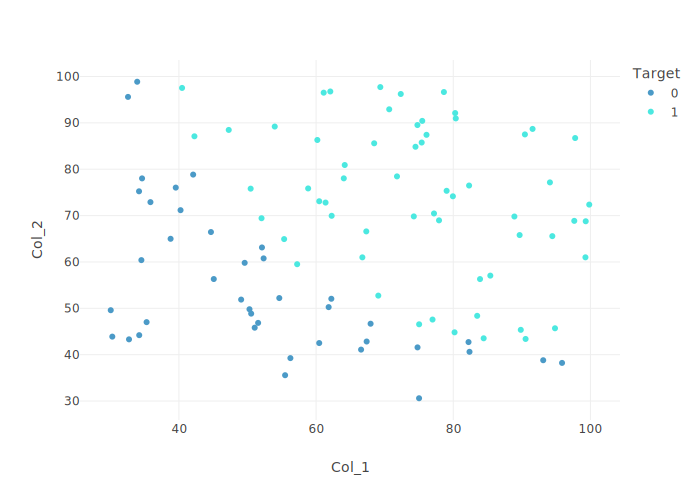

In [5]:
px.scatter(data, x = 'Col_1', y = 'Col_2', color = data['Target'].astype('str'), labels = {'color': 'Target'})

4. Separate X and y into two different objects.

In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(X.head())
print(y.head())

       Col_1      Col_2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
0    0
1    0
2    0
3    1
4    1
Name: Target, dtype: int64


5. Split the data into a train set and a test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y , ## Stratify splitting when you're training a classification model !
                                                    random_state = 42)

6. Analyze the explanatory variables, should we normalize the data ? If so normalize the data.

In [8]:
data.describe()

,Col_1,Col_2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


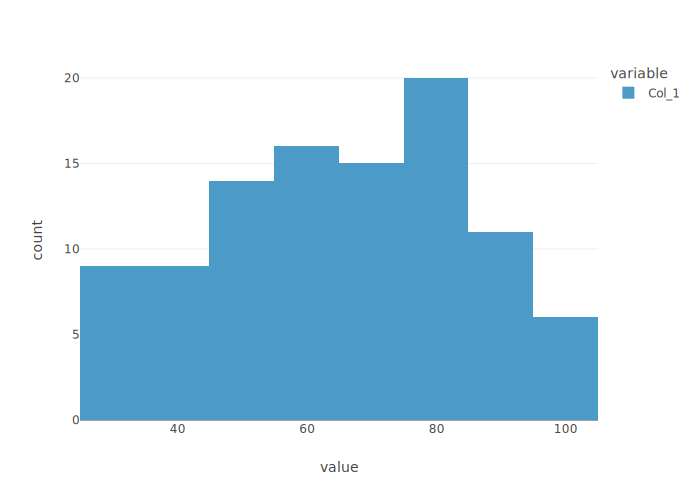

In [8]:
px.histogram(data["Col_1"])

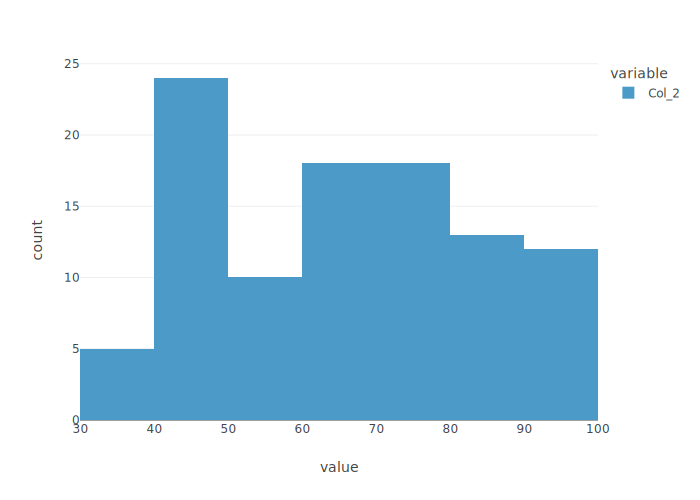

In [9]:
px.histogram(data["Col_2"])

In [10]:
# Data must be normalized to guarantee that we can interpret the model's parameters
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test) ### NO fit on X_test

7. Use the LogisticRegression function from sklearn in order to create a model instance and train it on the training data.

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

8. what's the accuracy on the train set ? and on the test set ?

In [12]:
print('Train accuracy : {}\nTest accuracy : {}'.format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))

Train accuracy : 0.875
Test accuracy : 0.95


9. what's the average score with a cross-validation using K=10, what's the score's standard deviation?

In [13]:
scores = cross_val_score(classifier,X_train, y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.875
standard deviation : 0.13693063937629152


10. Create an object containing the model's predictions on the train/test sets.

In [14]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

11. Display the confusion matrix derived from the predictions performed by your model on the training data, do the same on your test data. What do you think of your model's performance, do you think it would generalize well on unknown data?

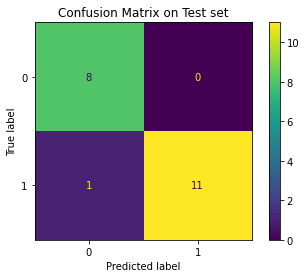

In [15]:
# Visualize confusion matrices
""" 
# PLOTLY METHOD
from plotly.subplots import make_subplots
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("train", "test"), 
                    x_title = 'Prediction', y_title = 'True label')
fig.update_layout(
        title = go.layout.Title(text = "Confusion matrices", x = 0.5))
fig.update_yaxes(autorange='reversed')
fig.add_trace(
    go.Heatmap(
        name = 'train',
        x = ['0', '1'], 
        y = ['0', '1'], 
        z = cm_train,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 1
)  
fig.add_trace(
    go.Heatmap(
        name = 'test',
        x = ['0', '1'], 
        y = ['0', '1'], 
        z = cm_test,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 2
)
"""
from IPython.display import clear_output
clear_output(wait=True) # Simply clear above string output

# SKLEARN 1.0 METHOD
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()



**From questions 9, 10 and 11 we can deduce that the generalized performances are very good ! Indeed, the test accuracy is comparable to the train accuracy and we can see in the confusion matrix that the prediction errors are very rare 🥳🥳**

12. Produce the ROC curve for the test set

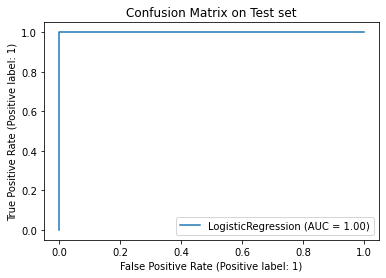

In [16]:
# Visualize ROC curves


"""
# PLOTLY METHOD 
probas_train = classifier.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = classifier.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show()
"""

from IPython.display import clear_output
clear_output(wait=True) # Simply clear above string output

# SKLEARN 1.0 METHOD
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()


**The area under the curves is quite low. This means that the model is very sensitive to the choice of the threshold used in the logistic regression.**

13. Create a dataframe named df that contains the explanatory variables, the target variable and the estimated probabilites from the classifier. Then use the library mlxtend to plot the decision boundary of the model. You might need to install it before : 
```python
!pip install mlextend
```
This documentation page might help you 😉 : http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/

In [17]:
df = pd.DataFrame(X_train, columns = ['Col_1', 'Col_2'])
df["proba"] = classifier.predict_proba(X_train)[:,1]
df["y"] = y_train.tolist()
df.sort_values(by="proba", ascending=False)

,Col_1,Col_2,proba,y
47,1.616330,1.097413,0.998408,1
43,1.248701,1.139486,0.996786,1
12,0.655663,1.631810,0.995509,1
26,1.719557,0.323877,0.994534,1
50,0.738202,1.387693,0.994042,1
...,...,...,...,...
8,-1.558775,-0.321138,0.047573,0
45,-0.506668,-1.658564,0.036440,0
59,-1.782960,-0.903145,0.010241,0
44,-1.649222,-1.241779,0.007217,0


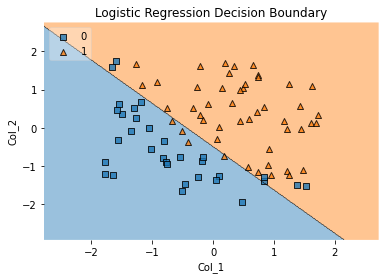

In [18]:
from mlxtend.plotting import plot_decision_regions


X = df.iloc[:,:2].values
y = df.iloc[:,-1].values

# Plotting decision regions
plot_decision_regions(X, y, clf=classifier, legend=2)

# Adding axes annotations
plt.xlabel('Col_1')
plt.ylabel('Col_2')
plt.title('Logistic Regression Decision Boundary')
plt.show()